<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-diegolarte/blob/main/Curso%20IBM%202/Modulo%203/Modulo3_Notes_IBM_Data_Analysis_A01794028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Module 3 - Exploratory Data Analysis

###Análisis Exploratorio de Datos (EDA)

Son los pasos preliminares al análisis de datos:
1. Resumir principales caracteristicas de los datos
2. Obtener un mejor entendimiento del set de datos
3. Descubrir relaciones entre variables
4. Extraer variables importantes

Pregunta de negocio:

¿ Cuales son las caracteristicas que mas impacto tienen en el precio de un carro?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [ ]:
df = pd.read_csv(filename)

Resumen estadistico de los datos numericos

In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Resumen de las variables categoricas usando value_counts()

In [ ]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Box Plot

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

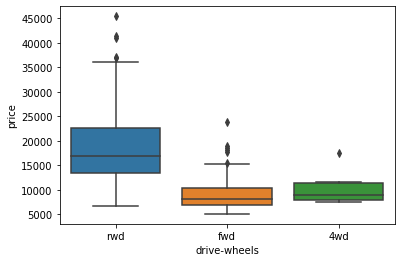

In [ ]:
sns.boxplot(x="drive-wheels", y = "price", data = df)

Scatter Plot

(0.0, 53219.049566791735)

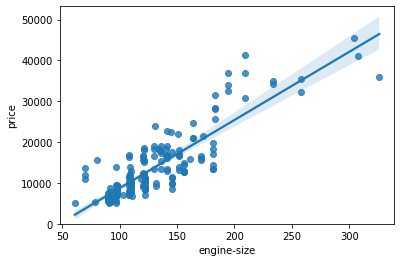

In [ ]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

A medida de que el tamaño del motor incrementa, el precio tambien tiende a incrementar, lo cual indica una correlacion positiva entre estas dos variables

### Agrupacion de datos con Group by

In [ ]:
df_test = df[['drive-wheels', 'body-style','price']]
df_grp = df_test.groupby(["drive-wheels", "body-style"], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Crear una pivot table para analizar mejor los datos

In [ ]:
df_pivot = df_grp.pivot(index= "drive-wheels", columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

HeatMap

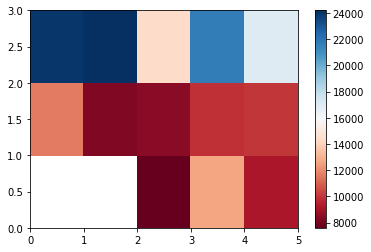

In [ ]:
plt.pcolor(df_pivot, cmap="RdBu")
plt.colorbar()
plt.show()

### Análisis de varianca con ANOVA

- Permite encontrar corelación entre diferentes grupos de una variable Categorica
- F-test score
- p-value: grado de confianza

In [ ]:
# Anova entre Honda y Subaru
df_anova = df[["make","price"]]
grouped_anova = df_anova.groupby(["make"])

In [ ]:
anova_results_1 = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("subaru")["price"])
anova_results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [ ]:
# Anova entre Honda y Jaguar
anova_results_1 = stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("jaguar")["price"])
anova_results_1

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

### Correlacion entre variables

(0.0, 53586.09790454491)

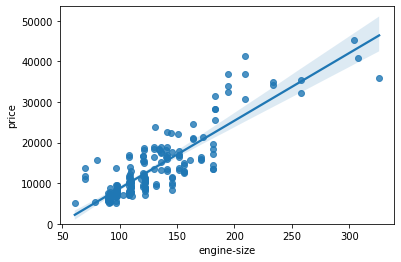

In [ ]:
# Correlacion entre dos features
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

Se evidencia correlacion positiva entre estas dos variables

(0.0, 48179.34065006115)

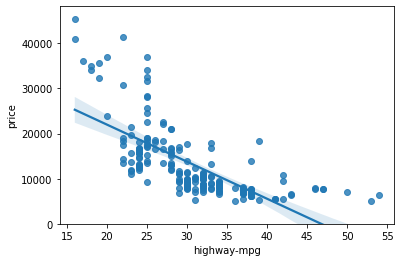

In [ ]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Se evidencia correlacion negativa entre estas dos variables

(0.0, 47414.1)

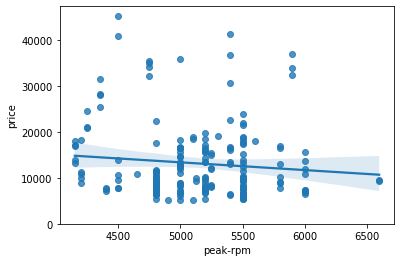

In [ ]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Se evidencia correlacion leve entre estas dos variables

### Metodos estadisticos de correlacion

Correlacion de pearson

- Mide la fuerza de la correlacion entre dos variables
- Coeficiente de correlacion:
  * Cercano a 1: Correlacion altamente positiva
  * Cercano a -1: Correlacion altamente negativa
  * Cercano a 0: No hay Correlacion
-P-value:
  * <0.001 Fuerte certeza en el resultado
  * <0.05 Moderada certeza en el resultado
  * <0.1 debil certeza en el resultado
  * ">0.1" No hay certeza en el resultado

In [ ]:
pearson_coef, p_value = stats.pearsonr(df["horsepower"], df["price"])

In [ ]:
print(pearson_coef)
print(p_value)

0.8095745670036559
6.369057428260101e-48


Heatmap de correlacion

<AxesSubplot:>

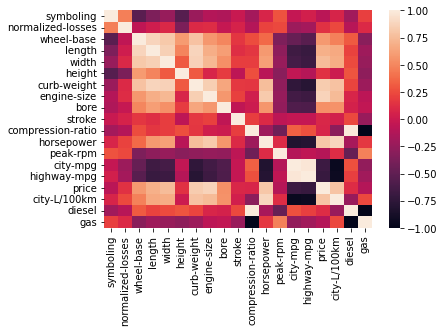

In [ ]:
sns.heatmap(df.corr())

###Evidencia Graded Review Questions

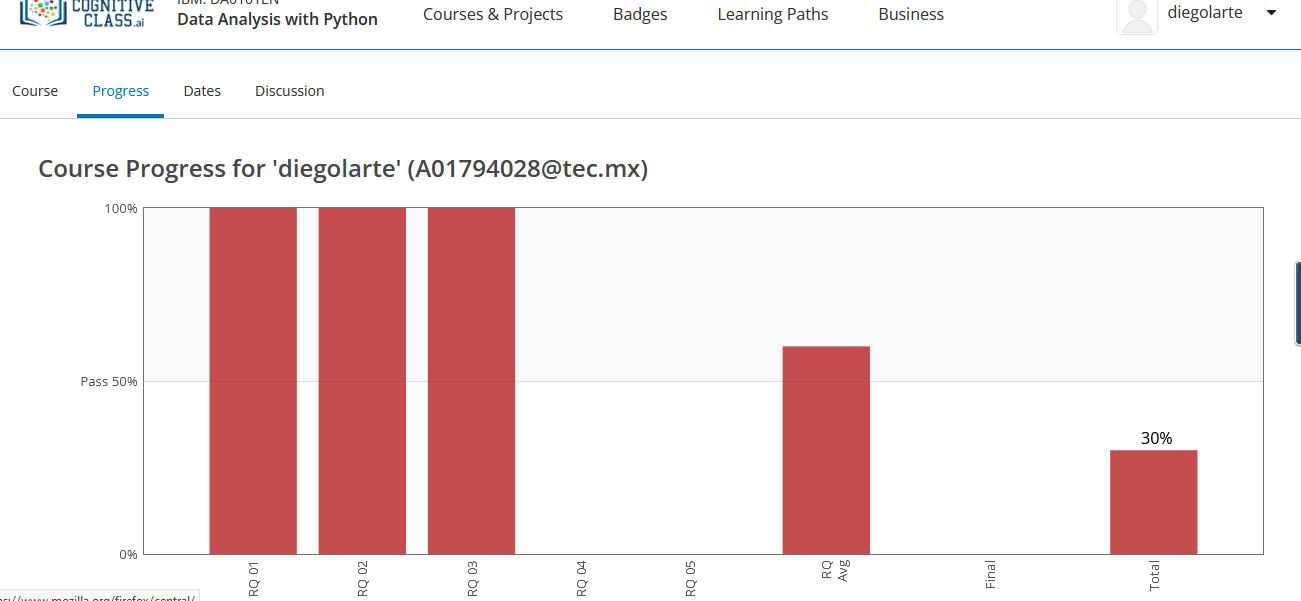